In [3]:
!pip install keras
!pip install tensorflow

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
traindata = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             horizontal_flip=True,
                              rotation_range=260,
                                vertical_flip=True,
                               fill_mode='reflect',
                               validation_split=0.2)

In [6]:
testdata = ImageDataGenerator (rescale=1./255)

In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='STOgbbvLfxMWr6WW3oa0aMS_DHNvZS1oiwFxovIijKhE',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'emergingmethodsforearlydetectiono-donotdelete-pr-62euwdetnfugga'
object_key = 'Dataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [8]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [9]:
pwd

'/home/wsuser/work'

In [10]:
import os
filename = os.listdir('/home/wsuser/work/Dataset/train_set')
filename

['forest', 'with fire']

In [11]:
x_train = traindata.flow_from_directory('/home/wsuser/work/Dataset/train_set',
                                        target_size = (64,64),
                                        class_mode ='categorical',
                                        batch_size = 100,
                                         shuffle=True)

Found 436 images belonging to 2 classes.


In [12]:
x_test = testdata.flow_from_directory("/home/wsuser/work/Dataset/test_set",
                                      target_size=(64,64),
                                      class_mode = 'categorical',
                                      batch_size = 100,
                                      shuffle=True)

Found 121 images belonging to 2 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,Dense,MaxPooling2D,Flatten

In [14]:
model = Sequential()

In [15]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

In [16]:
model.add(Dense(300,activation='relu'))
model.add(Dense(450,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [17]:
#compile
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [18]:
#train
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=30,
                    validation_data=x_test, 
                    validation_steps=len(x_test))

/tmp/wsuser/ipykernel_164/210988839.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=30,


Epoch 1/30
5/5 [==============================] - 25s 5s/step - loss: 1.7394 - accuracy: 0.5482 - val_loss: 1.6226 - val_accuracy: 0.5950
Epoch 2/30
5/5 [==============================] - 19s 4s/step - loss: 0.9807 - accuracy: 0.5344 - val_loss: 0.5342 - val_accuracy: 0.6777
Epoch 3/30
5/5 [==============================] - 19s 4s/step - loss: 0.6002 - accuracy: 0.6858 - val_loss: 0.4084 - val_accuracy: 0.9174
Epoch 4/30
5/5 [==============================] - 21s 4s/step - loss: 0.4537 - accuracy: 0.8211 - val_loss: 0.2568 - val_accuracy: 0.9421
Epoch 5/30
5/5 [==============================] - 19s 4s/step - loss: 0.3612 - accuracy: 0.8417 - val_loss: 0.1387 - val_accuracy: 0.9669
Epoch 6/30
5/5 [==============================] - 20s 4s/step - loss: 0.2736 - accuracy: 0.8670 - val_loss: 0.1486 - val_accuracy: 0.9174
Epoch 7/30
5/5 [==============================] - 20s 4s/step - loss: 0.2537 - accuracy: 0.8945 - val_loss: 0.1234 - val_accuracy: 0.9504
Epoch 8/30
5/5 [==================

In [20]:
#save the model
model.save('Forest_Fire.h5')

In [21]:
!tar zcvf Forest_Fire_Detection_Model.tgz Forest_Fire.h5

Forest_Fire.h5


In [22]:
ls -1

Dataset/
Forest_Fire_Detection_Model.tgz
Forest_Fire.h5


In [23]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 12.7 MB/s eta 0:00:01


In [24]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"uk4JOXBceduhZUfs4fs4cgLr0P28PbkZywnw77zuRjA9"
}
client = APIClient(wml_credentials)

In [25]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/85b81e7b77fe4809bcca258822c4def2:491094f0-ad66-4d7c-8031-25b5778c0011::',
      'guid': '491094f0-ad66-4d7c-8031-25b5778c0011',
      'name': 'Watson Machine Learning-wv',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Forest_Fire_Detection',
    'scope': {'bss_account_id': '85b81e7b77fe4809bcca258822c4def2'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '7dad30f3-c61f-4e15-805c-ff2d27b3e80b',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': 'cfb93919546c4990931065f37d87dfb8',
        'api_key': 'iVtt2jxkDYyJpwyTA8GG0HyGB7AJnz31yt3qHQQZDBSt',
        'secret_access_key': 'd16f293146f552f01aef26c9f4f049b225dbd1d1cb203646',
        'service_id': 'ServiceId-9afc2ab4-c985-4c67-885f-76d00acd34ee'},
       'editor': {'access_key_id': '4e8667f2e1234cf382ee41a3e7d79a29',
       

In [26]:
def guid_space_name(client,spacename):
  space = client.spaces.get_details()
  return(next(item for item in space['resources'] if item['entity']['name']==spacename)['metadata']['id'])

In [27]:
space_uid = guid_space_name(client,'Forest_Fire_Detection')
space_uid


'86335354-16a3-4356-9463-421a9541ae33'

In [28]:
client.set.default_space(space_uid)

'SUCCESS'

In [29]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [30]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [31]:
model_details = client.repository.store_model(model='Forest_Fire_Detection_Model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Forest_Fire",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [32]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T06:44:43.523Z',
  'id': '11775dd9-c408-49f6-bea2-04ea0f67466b',
  'modified_at': '2022-11-18T06:44:49.588Z',
  'name': 'Forest_Fire',
  'owner': 'IBMid-6610044PO1',
  'resource_key': '4590b1be-8864-42b2-a2bf-fcf88bc86bf9',
  'space_id': '86335354-16a3-4356-9463-421a9541ae33'},
 'system': {'warnings': []}}

In [33]:
model_id = client.repository.get_model_id(model_details)
model_id

'11775dd9-c408-49f6-bea2-04ea0f67466b'

In [34]:
client.repository.download(model_id,'B2_IBM_model.tar.gb')

Successfully saved model content to file: 'B2_IBM_model.tar.gb'


'/home/wsuser/work/B2_IBM_model.tar.gb'

In [35]:
ls -1

B2_IBM_model.tar.gb
Dataset/
Forest_Fire_Detection_Model.tgz
Forest_Fire.h5


In [37]:
from keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

In [38]:
model = load_model("Forest_Fire.h5")

In [54]:
img = image.load_img("/home/wsuser/work/Dataset/test_set/with fire/180802_CarrFire_010_large_700x467.jpg",target_size=(64,64))

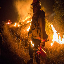

In [55]:
img

In [56]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x

array([[[[ 9.,  5.,  6.],
         [14.,  2.,  6.],
         [16.,  4.,  8.],
         ...,
         [17.,  7.,  6.],
         [18.,  4.,  4.],
         [19.,  7.,  9.]],

        [[12.,  3.,  6.],
         [16.,  4.,  8.],
         [17.,  5.,  9.],
         ...,
         [24., 13., 11.],
         [23.,  7.,  7.],
         [16.,  5.,  3.]],

        [[10.,  4.,  6.],
         [16.,  4.,  8.],
         [16.,  4.,  8.],
         ...,
         [20.,  9.,  5.],
         [25., 10.,  3.],
         [30., 19., 13.]],

        ...,

        [[ 8.,  3.,  9.],
         [ 8.,  3.,  9.],
         [ 7.,  2.,  8.],
         ...,
         [54., 28., 15.],
         [58., 24., 12.],
         [60., 27.,  8.]],

        [[ 4.,  0.,  5.],
         [ 5.,  0.,  6.],
         [ 5.,  0.,  6.],
         ...,
         [51., 23., 12.],
         [37., 12.,  5.],
         [55., 28., 19.]],

        [[ 6.,  1.,  7.],
         [ 6.,  1.,  7.],
         [ 5.,  0.,  6.],
         ...,
         [55., 25., 17.],
        

In [57]:
model.predict(x)

array([[0., 1.]], dtype=float32)

In [58]:
x_train.class_indices

{'forest': 0, 'with fire': 1}

In [59]:
op = ['No fire','fire']
pred = np.argmax(model.predict(x))
op[pred]

'fire'